In [1]:
import os 
from matplotlib import pyplot as plt
from natsort import natsorted

In [2]:
ROOT_DIR = "../../output/20240811_v3_mixed_env_repeat1/val_unslpash-trainset/1.0/no_consistnacy"

plot_id:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] losses:  [0.12040813938300643, 0.12041372458657457, 0.12036114008579817, 0.12040534662600193, 0.12038611465444167, 0.12039618413481447, 0.12038312650337402, 0.12036997585350441, 0.12041182910195655, 0.12041745998172296, 0.1204050198611286, 0.12037684948494037, 0.12037992770783604, 0.1203881948048042, 0.12039430693516301, 0.12040845732618537, 0.12038256273760149, 0.12035198086458776, 0.12034559622924361, 0.12034486753659115, 0.12038352003631493, 0.1203736944279323, 0.12033228466752917, 0.12034190784518918, 0.12038022609065391, 0.12034831110439781, 0.12037556259892881, 0.12035769153282874, 0.12036053565227323, 0.12035458641023272]
min_loss_id:  22
min_loss:  0.12033228466752917
min_plot_id:  23


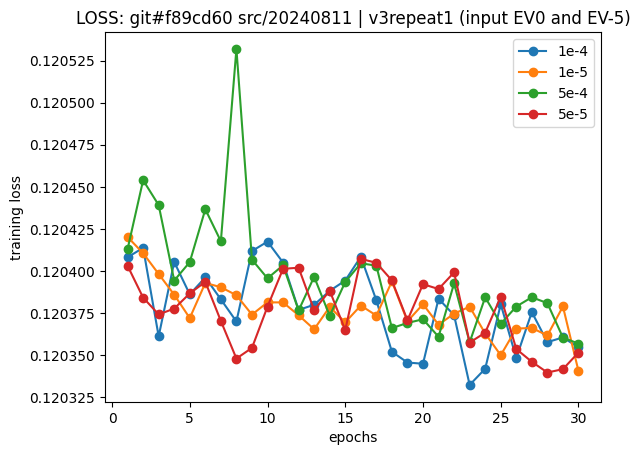

In [3]:
LRs = natsorted(os.listdir(ROOT_DIR))  
for lr in LRs:
    #checkpoints = natsorted(os.listdir(os.path.join(ROOT_DIR, lr)))
    checkpoints = ["chk{}".format(i) for i in range(1,31)]
    checkpoint_id = []
    avg_losses = []
    for checkpoint in checkpoints:
        # read all text files in directory and average to single float
        all_losses = []
        step_root_dir = os.path.join(ROOT_DIR, lr, checkpoint, 'lightning_logs/version_0/train_loss')
        step_dirs = natsorted(os.listdir(step_root_dir))
        for step_id in step_dirs:     
            for file in os.listdir(os.path.join(step_root_dir, step_id)):
                if file.endswith(".txt"):
                    with open(os.path.join(step_root_dir, step_id, file), 'r') as f:
                        all_losses.append(float(f.read()))       
        avg_loss = sum(all_losses) / len(all_losses)
        avg_losses.append(avg_loss)
        checkpoint_id.append(int(checkpoint.replace("chk","")))
    plt.plot(checkpoint_id, avg_losses, 'o-', label=lr)
    if lr == "1e-4":
        print("plot_id: ", checkpoint_id, "losses: ", avg_losses)
        # find the location that has the lowest loss
        min_loss = min(avg_losses)
        min_loss_id = avg_losses.index(min_loss)
        print("min_loss_id: ", min_loss_id)
        print("min_loss: ", min_loss)
        # print min plot_id
        print("min_plot_id: ", checkpoint_id[min_loss_id])
    plt.legend()
    plt.xlabel("epochs")
    plt.ylabel("training loss")
    #plt.title("Training loss average on timesteps [100,200,...,900]")
    plt.title("LOSS: git#f89cd60 src/20240811 | v3repeat1 (input EV0 and EV-5)")